In [2]:
from pydtmc import *
import numpy as np
import matplotlib.pyplot as plt
import asyncio

(0.0, 100.0)

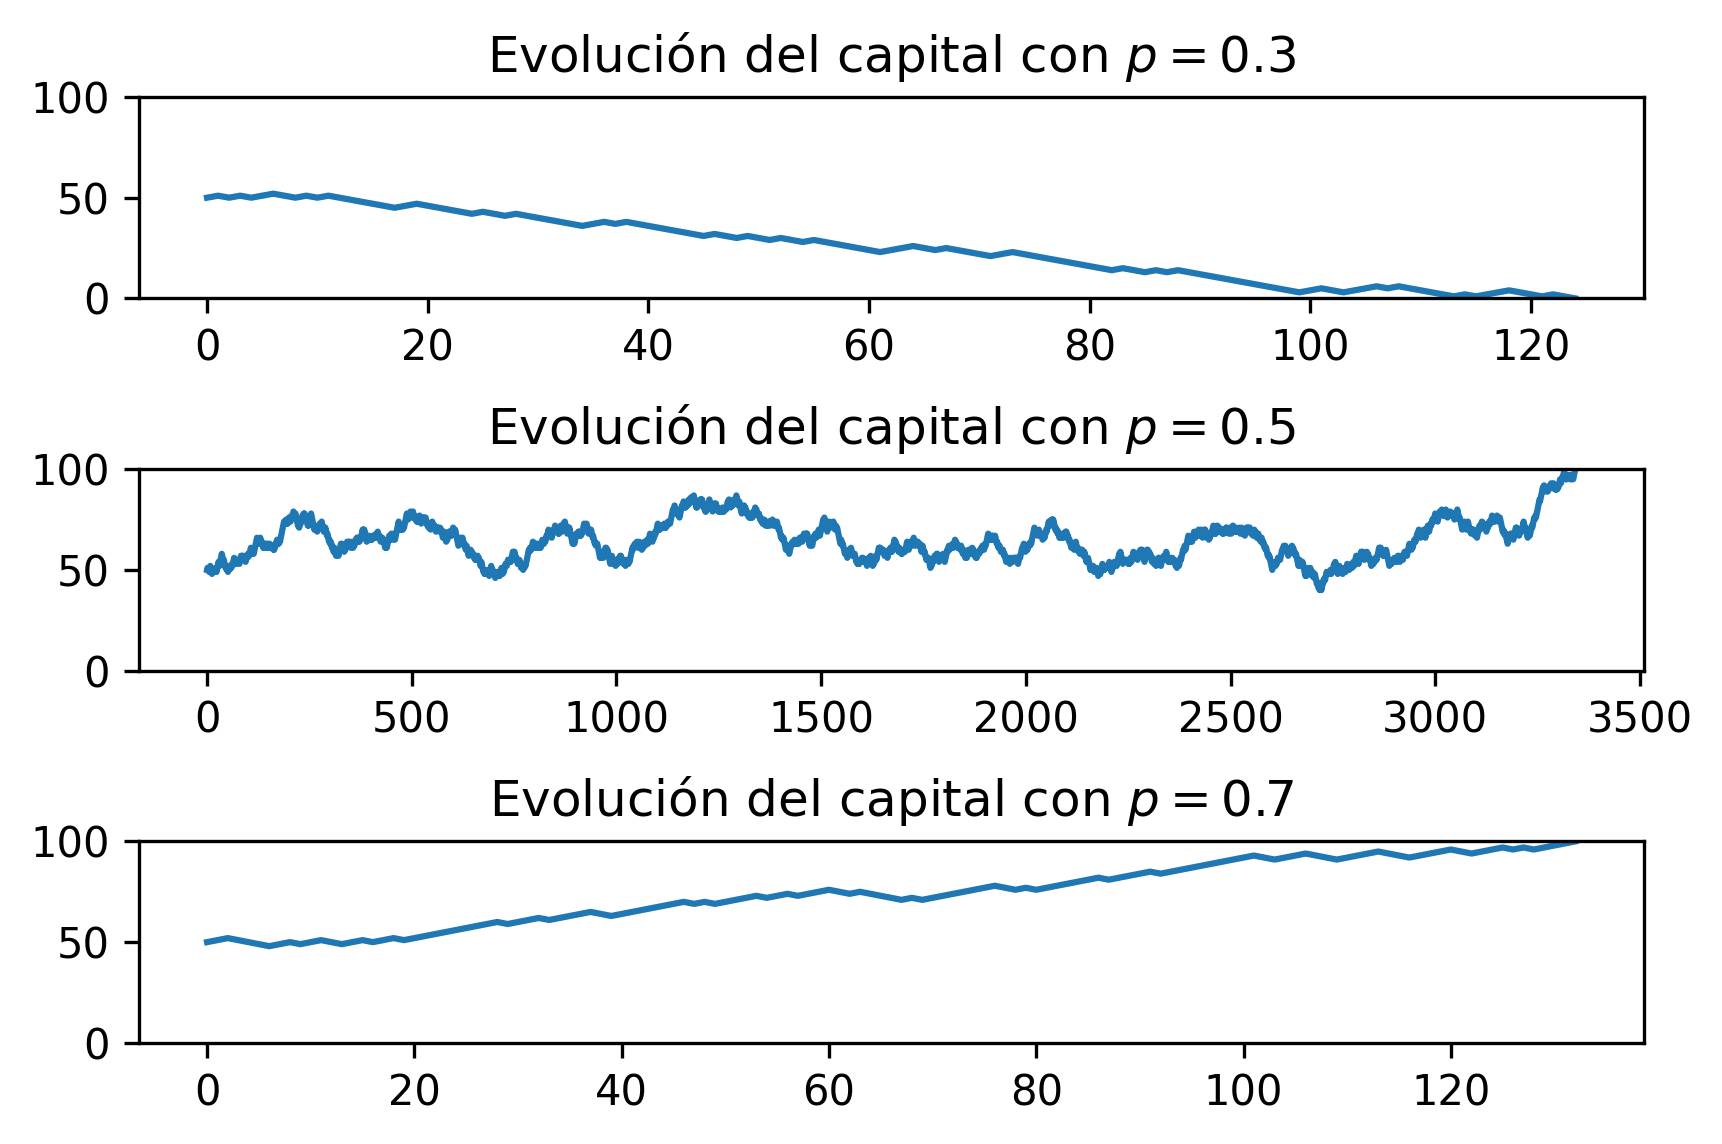

In [37]:
k = 50
s = 100
async def caminata(p, k, s):
  mc = MarkovChain.gamblers_ruin(s + 1, p, [str(i) for i in range(s + 1)])
  w = [str(k)]
  i = 0
  x = str(k)
  while i < 10000 and x != str(s) and x != "0":
    x = mc.next_state(w[i])
    w.append(x)
    i += 1
  return w

fig, ax = plt.subplots(3)
fig.tight_layout(pad=2.0)
fig.set_dpi(300)
ax[0].plot([int(i) for i in await caminata(0.3, k, s)])
ax[0].set_ylim(0, 100)
ax[0].set_title("Evolución del capital con $p = 0.3$")
ax[1].plot([int(i) for i in await caminata(0.5, k, s)])
ax[1].set_title("Evolución del capital con $p = 0.5$")
ax[1].set_ylim(0, 100)
ax[2].plot([int(i) for i in await caminata(0.7, k, s)])
ax[2].set_title("Evolución del capital con $p = 0.7$")
ax[2].set_ylim(0, 100)

In [44]:
cs = await asyncio.gather(*[caminata(0.3, k, s) for _ in range(1000)])
np.mean([len(c) for c in cs])

TypeError: unsupported operand type(s) for /: 'generator' and 'int'